In [153]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

from scipy.ndimage.filters import gaussian_filter1d
import numpy as np

/var/folders/4b/rkjcb02d7976w471m6bpyl7c0000gn/T/ipykernel_34111/64887255.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [154]:
# experiment_id = "l9ztw6n1S8WvzJkMoHyqfg"
experiment_id = "uGper4wkRiqDv3KcrOsvJg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,.,color_loss,0,0.094085
1,.,color_loss,1,0.091269
2,.,color_loss,2,0.116485
3,.,color_loss,3,0.103812
4,.,color_loss,4,0.061037
...,...,...,...,...
73237,.,surface_projection_loss,12202,168018.968750
73238,.,surface_projection_loss,12203,137175.437500
73239,.,surface_projection_loss,12204,141587.625000
73240,.,surface_projection_loss,12205,189812.359375


In [160]:
start = 0
end = 5000

In [178]:
loss = df.loc[df['tag'] == 'loss' ][start:end]
color_loss = df.loc[df['tag'] == 'color_loss'][start:end]
sdf_loss = df.loc[df['tag'] == 'sdf_loss'][start:end]
geometry_loss = df.loc[df['tag'] == 'geometry_loss'][start:end]
surface_projection_loss = df.loc[df['tag'] == 'surface_projection_loss'][start:end]
geometric_regularization = df.loc[df['tag'] == 'geometric_regularization'][start:end]

In [16]:
loss

,run,tag,step,value
72360,.,loss,0,1.085474
72361,.,loss,1,0.965303
72362,.,loss,2,1.004597
72363,.,loss,3,1.031233
72364,.,loss,4,1.063248
...,...,...,...,...
76355,.,loss,3995,0.353591
76356,.,loss,3996,0.343394
76357,.,loss,3997,0.267098
76358,.,loss,3998,0.289640


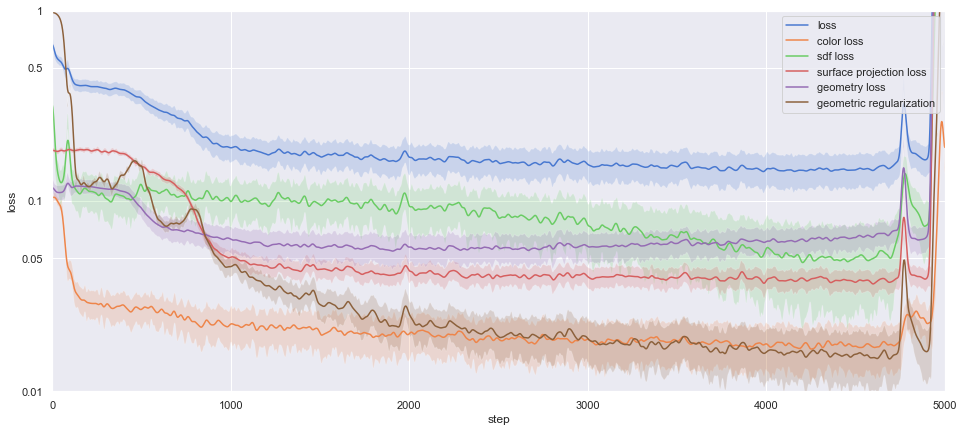

In [181]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
def smooth(loss, error_threshold=0.01):
    x,y = loss.step, loss.value
    y_smooth = gaussian_filter1d(y, sigma=10)
    upper_err = gaussian_filter1d(y + error_threshold, sigma=5)
    lower_err = gaussian_filter1d(y - error_threshold, sigma=5)

    return x, y, y_smooth, upper_err, lower_err


def plot_loss(loss, title, ax, error_threshold=0.01):
    x, y, y_smooth, upper_err, lower_err = smooth(loss, error_threshold)
    y_min = np.min(y_smooth) -  error_threshold
    y_max = y_smooth[0]

    # set axis scale 
    # ax.set_yscale('log')
    #ax.set_ylim(y_min, y_max)

    #plt.yticks([0.03,0.050,0.100,0.500,1],[0.03,0.050,0.100,0.500,1])

    ax.plot(x, y_smooth, label=title)
    #ax.plot(x, y, label='loss')
    ax.fill_between(x, lower_err, upper_err, alpha=0.2)

    ax.legend(loc='upper right')


fig, axs = plt.subplots( figsize=(16, 7 ))
axs.set_xlim(start, end)
axs.set_yscale('log')
axs.set_ylim(0.01, 1)
axs.set_xlabel('step')
axs.set_ylabel('loss')


plt.yticks([0.01,0.050,0.100,0.500,1],[0.01,0.050,0.100,0.500,1])
plot_loss(loss, "loss", axs, error_threshold=0.03)
plot_loss(color_loss, "color loss",axs, error_threshold=0.005)
plot_loss(sdf_loss, "sdf loss",axs, error_threshold=0.025)
plot_loss(surface_projection_loss, "surface projection loss",axs, error_threshold=0.005)
plot_loss(geometry_loss, "geometry loss",axs, error_threshold=0.01)
plot_loss(geometric_regularization, "geometric regularization",axs, error_threshold=0.005)

plt.show()